In [1]:
#importing libraries
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data= datasets.load_iris()
data = pd.DataFrame(data.data, columns=data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
#initialize an empty list to store the WCSS values for different K
WCSS = []

#try K values from 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)
    

C:\Users\sarmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

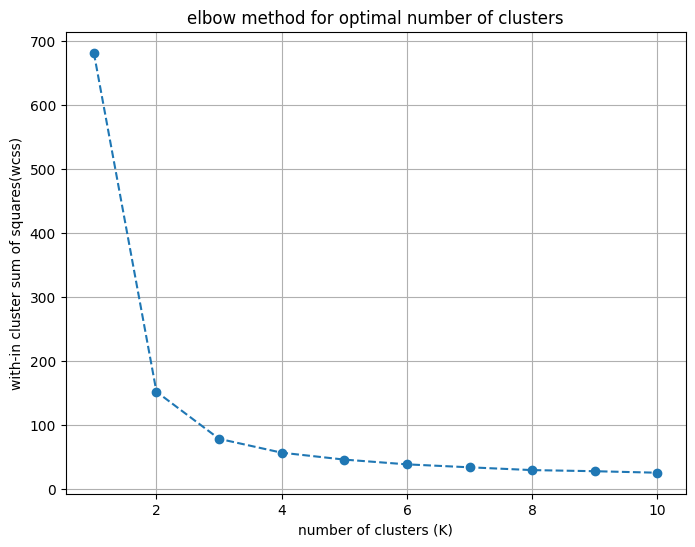

In [5]:
#plot the wcss values
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), WCSS, marker='o', linestyle='--')
plt.title('elbow method for optimal number of clusters')
plt.xlabel('number of clusters (K)')
plt.ylabel('with-in cluster sum of squares(wcss)')
plt.grid(True)
plt.show()

C:\Users\sarmi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


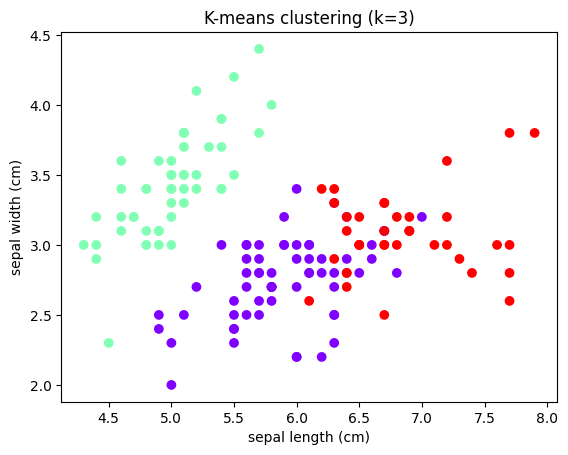

In [6]:
k=3 #change this to the determined optimal value

#create a k=means model with the optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
#fit the k-means model to a data
kmeans.fit(data)
#add cluster labels to the dataframe 
data['cluster'] = kmeans.labels_
#visualize the cluster (for 2D data, you choose any two features for plotting)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['cluster'], cmap='rainbow')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'K-means clustering (k={k})')

plt.show()